In [ ]:
#Classification
1.#In KNN k should be odd number. k value should be given by us. Used for smaller datasets(500)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = "D:\\datasets\\iris.csv"
#Assign column names to the dataset
n = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width','class']
#Read dataset to pandas dataframe
dataset = pd.read_csv(url,names=n)

In [3]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64

In [5]:
x= dataset.iloc[:, :-1]
y = dataset.iloc[:,-1]

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.15,random_state= 0)

In [15]:
'''from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
ts_score=[]
import numpy as np
for j in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=j,test_size=0.1)
    kn= KNeighborsClassifier().fit(x_train,y_train)
    
    ts_score.append(kn.score(x_test,y_test))
K = ts_score.index(np.max(ts_score))'''

In [16]:
#K

0

In [44]:
classifier = KNeighborsClassifier(n_neighbors=43)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=43, p=2,
           weights='uniform')

In [45]:
y_pred = classifier.predict(x_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)#r2 score for linear regression and accuracy score for classification

0.9130434782608695

In [33]:
#to find the K value 
error=[]

#Calculating error for K values between 1 and 40
for i in range(3,100,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_y_test = knn.predict(x_test)
    error.append(np.mean(pred_y_test != y_test))

Text(0, 0.5, 'Mean Error')

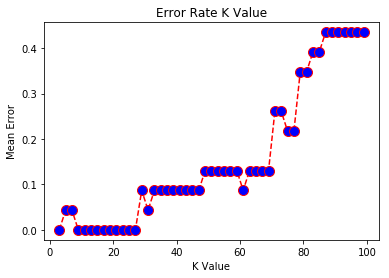

In [37]:
plt.plot(range(3,100,2),error, color = 'red', linestyle='dashed', marker= 'o',
          markerfacecolor ='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
#91% total accuracy. So how to find accuracy for each type.We have two ways to do that. Confusion matrix and classification report


In [50]:
from sklearn.metrics import confusion_matrix,classification_report



In [48]:
confusion_matrix(y_test,y_pred)

array([[7, 0, 0],
       [0, 9, 2],
       [0, 0, 5]], dtype=int64)

In [51]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.82      0.90        11
 Iris-virginica       0.71      1.00      0.83         5

      micro avg       0.91      0.91      0.91        23
      macro avg       0.90      0.94      0.91        23
   weighted avg       0.94      0.91      0.92        23



In [ ]:
#disadvantage KNN is slow. 